In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
from sklearn.model_selection import train_test_split

In [2]:
data_path = "Z:\\Data_Science\\Data\\how_am_i_feeling\\"

In [3]:
train_set = pd.read_csv(data_path + "train_set.csv")

drops = [11244, 15838, 16540, 8030, 23894, 23596]
for drop in drops:
    train_set.drop(train_set[train_set["id_img"] == drop].index, inplace = True)

train_set.reset_index(drop=True, inplace=True)
train_set

,label,id_img,path
0,happy,22373,happy/22373.jpg
1,happy,21433,happy/21433.jpg
2,happy,12418,happy/12418.jpg
3,happy,21278,happy/21278.jpg
4,happy,8081,happy/08081.jpg
...,...,...,...
6165,sadness,11346,sadness/11346.jpg
6166,sadness,4441,sadness/04441.jpg
6167,sadness,15236,sadness/15236.jpg
6168,sadness,27361,sadness/27361.jpg


In [4]:
def custom_noise(image):
    noise = np.random.normal(0 , 0.1, image.shape)
    new_image = image + noise 
    return new_image

In [5]:
dict_list = []
for i in range(len(train_set)):
    image = cv.imread(data_path + "\\train\\" + train_set["path"][i], 0)/255
    label = train_set["label"][i]
    #withNoise = custom_noise(image)
    dict_list.append({"Image":image, "Label":label})
    dict_list.append({"Image":np.rot90(image), "Label":label})
    dict_list.append({"Image":np.rot90(np.rot90(image)), "Label":label})
    dict_list.append({"Image":np.rot90(np.rot90(np.rot90(image))), "Label":label})
    #dict_list.append({"Image":withNoise, "Label":label})
    dict_list.append({"Image":np.fliplr(image), "Label":label})
    dict_list.append({"Image":np.flipud(image), "Label":label})

df = pd.DataFrame(dict_list)
df = df.sample(frac=1)
df

,Image,Label
15223,"[[0.3568627450980392, 0.33725490196078434, 0.3...",happy
30139,"[[0.5686274509803921, 0.5686274509803921, 0.56...",sadness
31436,"[[0.32941176470588235, 0.39215686274509803, 0....",sadness
5947,"[[0.47843137254901963, 0.5019607843137255, 0.5...",happy
33725,"[[0.43137254901960786, 0.3764705882352941, 0.3...",sadness
...,...,...
500,"[[0.8666666666666667, 0.8705882352941177, 0.88...",happy
25600,"[[0.3607843137254902, 0.3607843137254902, 0.35...",sadness
29817,"[[0.49019607843137253, 0.2823529411764706, 0.1...",sadness
9618,"[[0.21176470588235294, 0.09803921568627451, 0....",happy


In [6]:
df["Label"] = df["Label"].map({"happy":0, "sadness":1})
df

,Image,Label
15223,"[[0.3568627450980392, 0.33725490196078434, 0.3...",0
30139,"[[0.5686274509803921, 0.5686274509803921, 0.56...",1
31436,"[[0.32941176470588235, 0.39215686274509803, 0....",1
5947,"[[0.47843137254901963, 0.5019607843137255, 0.5...",0
33725,"[[0.43137254901960786, 0.3764705882352941, 0.3...",1
...,...,...
500,"[[0.8666666666666667, 0.8705882352941177, 0.88...",0
25600,"[[0.3607843137254902, 0.3607843137254902, 0.35...",1
29817,"[[0.49019607843137253, 0.2823529411764706, 0.1...",1
9618,"[[0.21176470588235294, 0.09803921568627451, 0....",0


In [23]:
np.array([[[1,1, 1, 2],[1,1, 4, 6], [1,1, 8, 5], [1,1, 5, 1]],
[[1,1, 1, 2],[1,1, 4, 6], [1,1, 8, 5], [1,1, 5, 1]]]).shape

(2, 4, 4)

In [29]:
lista = []
for i in df["Image"]:
    lista.append(i)
np.array(lista).shape

(37020, 48, 48)

In [7]:
X = np.stack(np.array(df["Image"]))
y = np.array(df["Label"])
print(X.shape)
print(y.shape)

(37020, 48, 48)
(37020,)


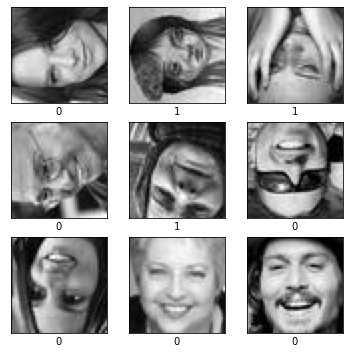

In [30]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i], cmap="gray")
    plt.xlabel(y[i])
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(48, 48)),
    keras.layers.Dense(72, activation='sigmoid'),
    keras.layers.Dense(36, activation='sigmoid'),
    keras.layers.Dense(18, activation='sigmoid'),
    keras.layers.Dense(8, activation='sigmoid'),
    keras.layers.Dense(2, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
926/926 [==============================] - 1s 800us/step - loss: 0.6917 - accuracy: 0.5307
Epoch 2/50
926/926 [==============================] - 1s 840us/step - loss: 0.6913 - accuracy: 0.5322
Epoch 3/50
926/926 [==============================] - 1s 777us/step - loss: 0.6903 - accuracy: 0.5305
Epoch 4/50
926/926 [==============================] - 1s 813us/step - loss: 0.6773 - accuracy: 0.5766
Epoch 5/50
926/926 [==============================] - 1s 842us/step - loss: 0.6652 - accuracy: 0.6009
Epoch 6/50
926/926 [==============================] - 1s 798us/step - loss: 0.6585 - accuracy: 0.6104
Epoch 7/50
926/926 [==============================] - 1s 787us/step - loss: 0.6554 - accuracy: 0.6166
Epoch 8/50
926/926 [==============================] - 1s 784us/step - loss: 0.6534 - accuracy: 0.6187
Epoch 9/50
926/926 [==============================] - 1s 828us/step - loss: 0.6492 - accuracy: 0.6243
Epoch 10/50
926/926 [==============================] - 1s 776us/step - loss: 0.650

In [66]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
test_acc

270/270 - 0s - loss: 0.7444 - accuracy: 0.5381


0.5380875468254089

In [ ]:
test_set = pd.read_csv(data_path + "test_set.csv")
test_set

In [52]:
dict_list = []
for i in range(len(test_set)):
    image = cv.imread(data_path + test_set["path"][i], 0)/255
    dict_list.append({"Image":image})

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Traceback (most recent call last):
  File "C:\Users\gvazquez\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-d2691b207eac>", line 3, in <module>
    image = cv.imread(data_path + test_set["path"][i], 0)/255
MemoryError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\gvazquez\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'MemoryError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\gvazquez\AppData\Roaming\Python\Python36\site-packages\IPython\co

MemoryError: 

In [ ]:
df_test = pd.DataFrame(dict_list)
to_pred = np.stack(np.array(df_test["Image"]))
to_pred.shape

In [54]:
predictions = model.predict(to_pred)

In [55]:
dict_list = []
for i in range(len(predictions)):
    id_img = test_set["id_img"][i]
    label = np.argmax(predictions[i])
    dict_list.append({"id_img":id_img, "label":label})
predict = pd.DataFrame(dict_list)
predict["label"] = predict["label"].map({0:"happy", 1:"sadness"})
predict

,id_img,label
0,18341,happy
1,13176,happy
2,23945,happy
3,15968,happy
4,18382,happy
...,...,...
548,14533,happy
549,16151,happy
550,20735,happy
551,14618,happy


In [59]:
predict.to_csv("prediction.csv", index=False)